In [1]:
import pytz
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from indicators import ema 

In [2]:
df = yf.download("CC=F", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
df["ema_5"] = ema.ema(df["Close"], 5)
df["ema_65"] = ema.ema(df["Close"], 65)

In [4]:
def ema_crossover_backtest(df):
    """
    Calculates when to go long or short based on the EMA crossover
    :param df: dataframe with close prices
    :return: dataframe with indicators of when the strategy is long 1, or short -1
    """
    df['signal'] = np.where(df['ema_5'] > df['ema_65'], 1, -1)
    df['daily_ret'] = df['Close'].pct_change() * df['signal'].shift(1) # Daily return based on signal
    return df

In [5]:
data_with_signals = ema_crossover_backtest(df)

In [6]:
cumulative_returns = np.cumsum(data_with_signals['daily_ret'])

sharpe_ratio = np.sqrt(252) * np.mean(data_with_signals['daily_ret']) / np.std(data_with_signals['daily_ret'])
print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: -0.4355281884875544


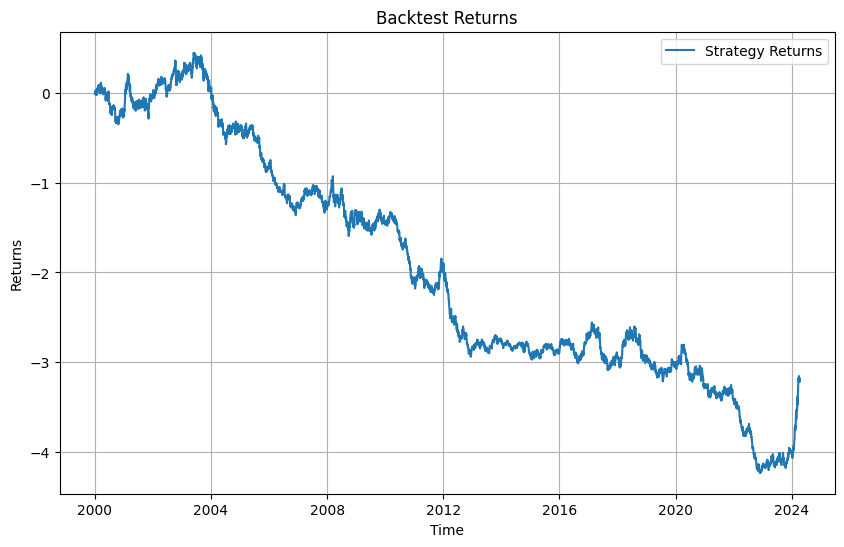

In [7]:
# Plot returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Strategy Returns')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Backtest Returns')
plt.legend()
plt.grid(True)
plt.show()